In [1]:
#Vtk generation
import flopy ## Org
from mf6Voronoi.tools.vtkGen import Mf6VtkGenerator ## Org
from mf6Voronoi.utils import initiateOutputFolder ## Org

In [2]:
import os
os.listdir('../../../../mf6models')
#!pip install -U flopy --break-system-packages

['ex-gwf-advtidal',
 'ex-gwf-bcf2ss-p01a',
 'ex-gwf-fhb',
 'ex-gwf-toth',
 'ex-gwf-twri01',
 'hillslopeModel',
 'openPit',
 'regionalModel']

In [3]:
# load simulation
simName = 'mf6Sim' ## Org
modelName = 'mf6Model' ## Org
modelWs = '../../../../mf6models/openPit' ## Org
sim = flopy.mf6.MFSimulation.load(sim_name=simName, version='mf6', ## Org
                             exe_name='bin/mf6.exe', ## Org
                             sim_ws=modelWs) ## Org

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package disv...
    loading package ic...
    loading package npf...
    loading package sto...
    loading package rch...
    loading package evt...
    loading package drn...
    loading package oc...
  loading solution package mf6model...


In [4]:
sim.model_names

['mf6model']

In [5]:
gwf = sim.get_model('mf6model') ## Org

In [6]:
gwf.output.head()

In [7]:
head = gwf.output.head().get_data()
head[4]


array([[1636.16110656, 1642.51886889, 1770.87960087, ..., 2291.43725092,
        2286.5571625 , 2289.0801656 ]])

In [8]:
bud = gwf.output.budget()
bud


In [9]:
spdis = bud.get_data(text='DATA-SPDIS')[0]
spdis

rec.array([(     1,      1, 0.,  0.00000000e+00,  0.00000000e+00, -6.34195840e-09),
           (     2,      2, 0.,  0.00000000e+00,  0.00000000e+00, -6.34195840e-09),
           (     3,      3, 0.,  0.00000000e+00,  0.00000000e+00, -6.34195840e-09),
           ...,
           (133063, 133063, 0., -4.92698460e-10, -2.11569222e-10, -9.96632416e-10),
           (133064, 133064, 0., -6.13056448e-10, -9.06128594e-10, -9.35660850e-10),
           (133065, 133065, 0., -4.81945043e-10, -4.70537243e-10, -9.95644036e-10)],
          dtype=[('node', '<i4'), ('node2', '<i4'), ('q', '<f8'), ('qx', '<f8'), ('qy', '<f8'), ('qz', '<f8')])

In [10]:
import numpy as np
hactive = head[head>gwf.hdry]
hactive = head[head<gwf.hnoflo]
levels = np.linspace(hactive.min(),hactive.max(),10)
levels


array([1624.52820229, 1698.94479901, 1773.36139572, 1847.77799243,
       1922.19458914, 1996.61118585, 2071.02778256, 2145.44437928,
       2219.86097599, 2294.2775727 ])

In [11]:
pmv.plot_array?

Object `pmv.plot_array` not found.


import matplotlib.pyplot as plt ## Org
fig, ax = plt.subplots(figsize=(10, 10)) ## Org

qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge(spdis, gwf)
pmv = flopy.plot.PlotMapView(gwf, layer=3)
pmv.plot_grid(colors='crimson', lw=0.3, alpha=0.5,ax=ax, zorder=1) ## Org
pmv.plot_array(head, masked_values=[1e+30], cmap='viridis', 
               alpha=0.5, ax=ax, zorder=2) ## Org
pmv.contour_array(head, levels=levels, linewidths=3., ax=ax,
                  zorder=3)
pmv.plot_vector(qx, qy, normalize=True, color="crimson", 
                masked_values=[0], scale_units='width',scale=20, 
                istep=4,
                jstep=4,
                ax=ax,
                zorder=4)
#ax.set_xlim(552000, 553000) ## Org
#ax.set_ylim(5307500, 5308500) ## Org

In [21]:
backgroundImageDict = {
    'fig':'Png/backgroundImage.png',
    'wrl':'Png/backgroundImage.pgw'
}

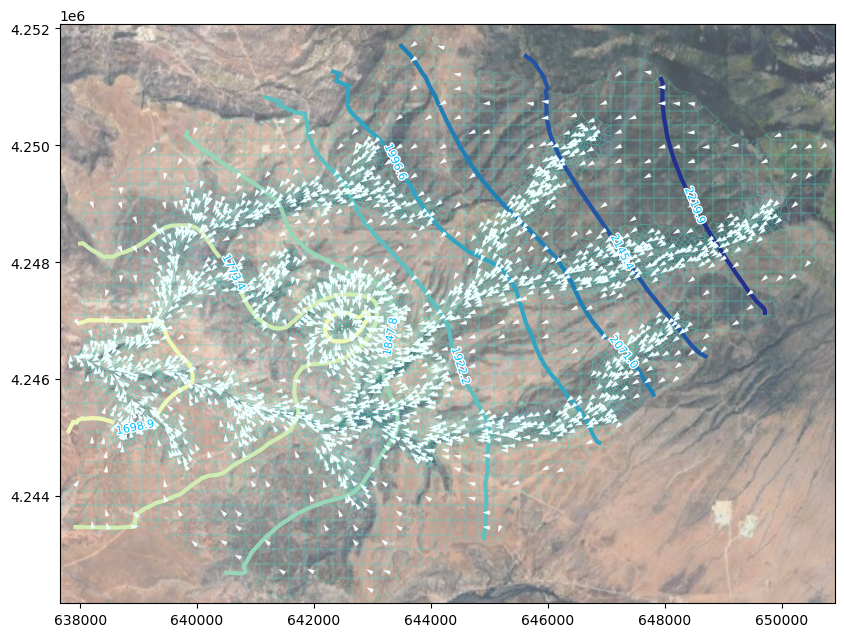

In [23]:
from mf6Voronoi.tools.graphs2d import FlowVectorGenerator
FlowVectorGenerator(gwf, layer=8, plotGrid=False,
                    kstpkper=(0,4),
                    backgroundImageDict = backgroundImageDict,
                    scale=100,
                    contourLevels = 10,
                    istep=4,
                    jstep=4)